<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/03-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#⭕ Ejercicio

Usaremos un dataset sobre publicidad. Este dataset consta de 200 registros, cada registro consta de las variables.

* TV: dólares de publicidad gastados en TV para un solo producto en un mercado determinado (en miles de dólares)
* Radio: inversión publicitaria en radio
* Newspaper: inversión publicitaria en periódicos
* Sales: ventas de un solo producto en un mercado determinado (en miles de unidades).


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/advertising.csv'
df = pd.read_csv(url,index_col=0)


Objetivos:

1. Entrenar un modelo de regresión lineal usando el 85% de las instancias, separar el resto para prueba. **No olvides el preprocesamiento**, **cuidado con el data leakage**.
2. Reportar las métricas de rendimiento MAE, MSE en las predicciones con el conjunto de prueba solamente.
3. Con base en la métrica de rendimiento MAE, escoge el mejor modelo de regresión lineal. Es decir, ¿cuál es el menor MAE que puedes obtener en el conjunto de prueba? Junto con este número, reporta los parámetros y la combinación de técnicas que usaste.

Considera las siguientes situaciones en el preprocesamiento:

* ¿Hay valores faltantes? En caso de que sí, recuerda que tienes dos opciones: remover estas instancias o hacer imputación.
* ¿Cuál es el rango de las 3 variables? ¿tienen magnitudes muy diferentes?
* ¿Hay alguna variable que consideres que no es muy relevante?
* Realiza la(s) técnica(s) de preprocesamiento que consideres necesario: selección de features, normalización.

**Prueba varios modelos combinando diferentes técnicas y herramientas de preprocesamiento**, observa su efecto en el rendimiento con la métrica especificada.




##2. Analizar datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
df.shape

(200, 4)

In [6]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [7]:
 df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


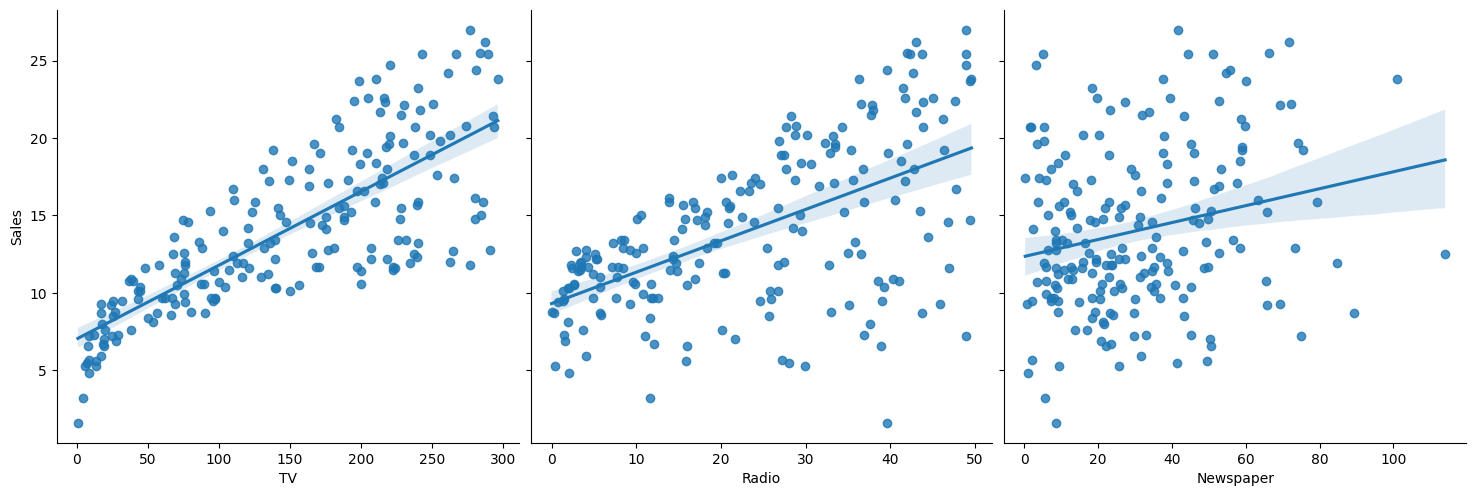

In [8]:
## Exploración de datos: Pair plot por ventas
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=1, kind='reg')
plt.show()

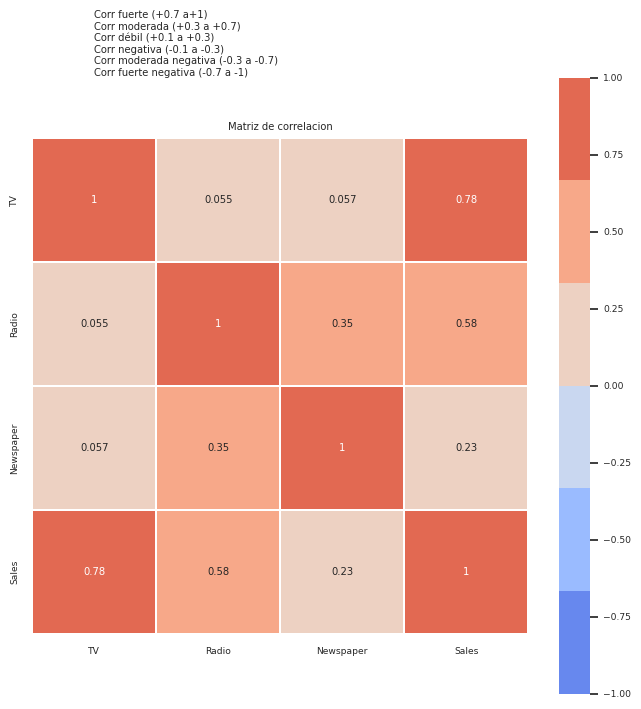

In [20]:
## Exploración de datos: Matriz de correlación
my_corr = df.corr()
my_corr.head(5)

print()

my_corr =  df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(my_corr, annot=True, square=True,
            cmap=sns.color_palette("coolwarm"),
            vmax=1,      #np.max(np.sort(my_corr.values)[:,-2]),
            vmin=-1,
           linewidths=0.3)
plt.title("Matriz de correlacion")
plt.text(0.5,-0.5, "Corr fuerte (+0.7 a+1)\nCorr moderada (+0.3 a +0.7)\nCorr débil (+0.1 a +0.3)\nCorr negativa (-0.1 a -0.3)\nCorr moderada negativa (-0.3 a -0.7)\nCorr fuerte negativa (-0.7 a -1)")
plt.show()



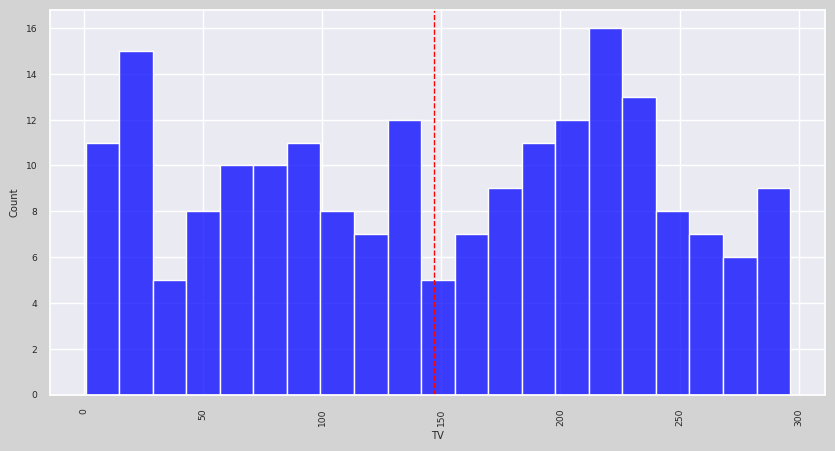

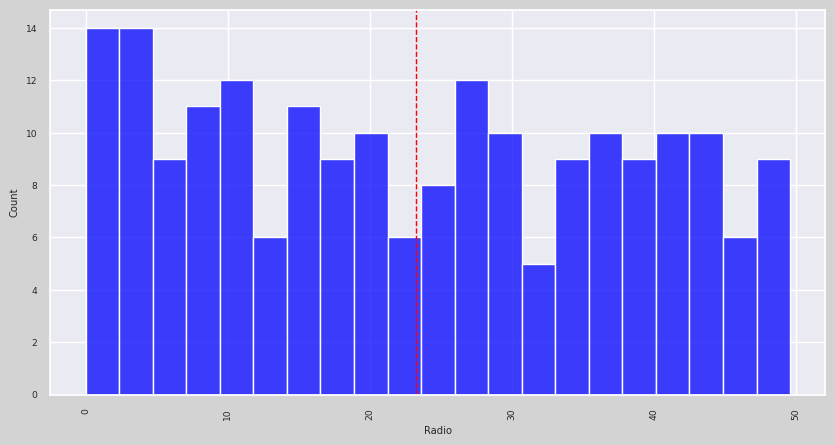

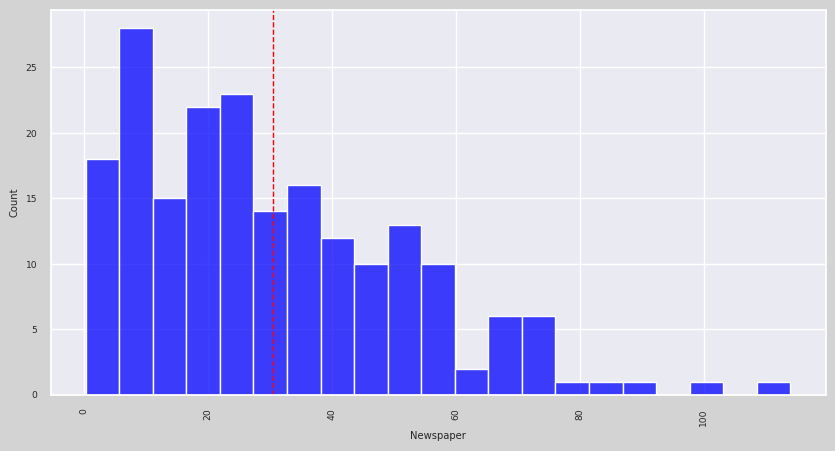

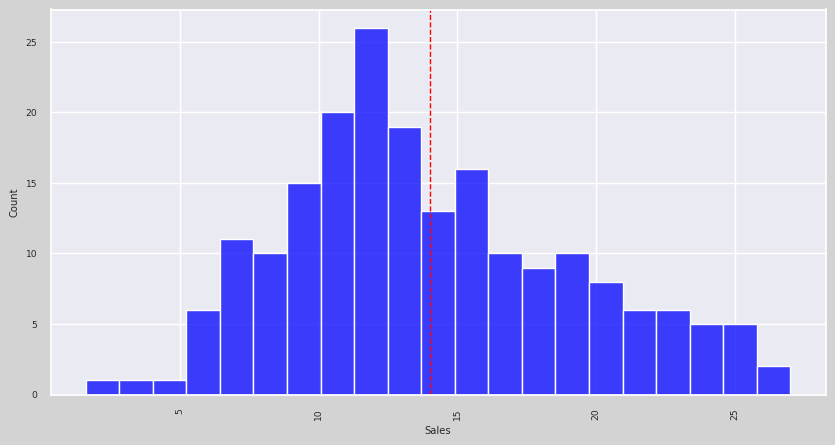

In [19]:
sns.set(font_scale=0.6)

Columnas=['TV', 'Radio', 'Newspaper', 'Sales']

# Iterar sobre cada variable en la lista Variables
for feature in Columnas:
    # Crear una figura con tamaño y color de fondo específicos
    plt.figure(figsize=(10, 5), facecolor='lightgrey')

    # Trazar el histograma de la variable actual
    sns.histplot(data=df, x=feature, color='blue', bins=21)

    # Añadir una línea vertical para la media de la variable actual
    plt.axvline(df[feature].mean(), color='red', linestyle='dashed', linewidth=1)

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.xticks(rotation=90)

    # Mostrar el gráfico
    plt.show()

In [22]:
# Verificar si hay valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


**¿Hay valores faltantes?**

No, no hay valores faltantes en el conjunto de datos.

In [23]:
# Evaluar el rango de las tres variables
print("\nRango de las variables:")
for col in ['TV', 'Radio', 'Newspaper']:
    print(f"{col}: {df[col].max() - df[col].min()}")


Rango de las variables:
TV: 295.7
Radio: 49.6
Newspaper: 113.7


**¿Cuál es el rango de las 3 variables? ¿tienen magnitudes muy diferentes?**

Los rangos de las variables son: TV: 295.7, Radio: 49.6, Newspaper: 113.7. Aunque las magnitudes son diferentes, no son extremadamente dispares.
Sin embargo, la diferencia en las magnitudes de las variables ‘TV’ y ‘Radio’ es considerable, por lo que pod´ria ser necesario normalizarlas para asegurar que todas las variables tengan la misma escala.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador a las características y transformarlas
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Entrenar el modelo con los datos sin normalizar
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Calcular y mostrar las métricas de rendimiento
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f"Modelo sin normalizar - MAE: {mae}, MSE: {mse}")

# Normalizar las variables
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Entrenar el modelo con los datos normalizados
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
predictions_scaled = model_scaled.predict(X_test_scaled)

# Calcular y mostrar las métricas de rendimiento
mae_scaled = mean_absolute_error(y_test, predictions_scaled)
mse_scaled = mean_squared_error(y_test, predictions_scaled)
print(f"Modelo normalizado - MAE: {mae_scaled}, MSE: {mse_scaled}")

Modelo sin normalizar - MAE: 1.356716107647725, MSE: 2.854093191802122
Modelo normalizado - MAE: 1.3567161076477252, MSE: 2.8540931918021233


In [35]:
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
r2_total = model.score(X, y)
print(f"Modelo sin normalizar - R2 en el entrenamiento: {r2_train}, R2 en la prueba: {r2_test}, R2 total: {r2_total}")

# Calcular y mostrar el coeficiente de determinación para el modelo normalizado
r2_train_scaled = model_scaled.score(X_train_scaled, y_train)
r2_test_scaled = model_scaled.score(X_test_scaled, y_test)
r2_total_scaled = model_scaled.score(X_scaled, y)
print(f"Modelo normalizado - R2 en el entrenamiento: {r2_train_scaled}, R2 en la prueba: {r2_test_scaled}, R2 total: {r2_total_scaled}")

Modelo sin normalizar - R2 en el entrenamiento: 0.8936793584593188, R2 en la prueba: 0.9110275702091712, R2 total: 0.8969225203073515
Modelo normalizado - R2 en el entrenamiento: 0.8936793584593188, R2 en la prueba: 0.9110275702091711, R2 total: 0.8969225203073515


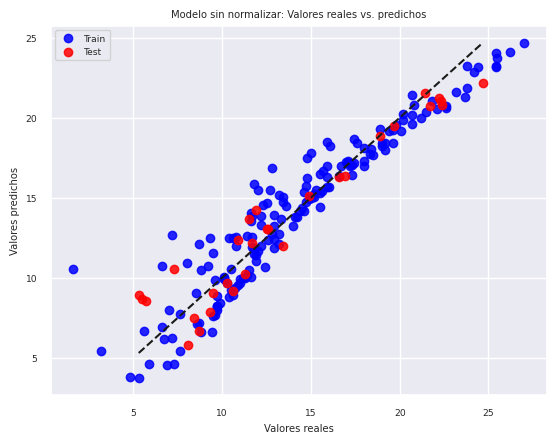

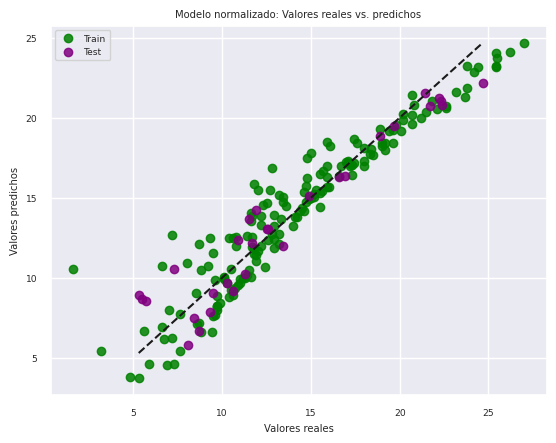

In [33]:
# Predicciones para el conjunto de entrenamiento
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_train_scaled = model_scaled.predict(X_train_scaled)
y_pred_test_scaled = model_scaled.predict(X_test_scaled)

# Crear un eje x para la línea de referencia
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)

# Crear una figura para el modelo sin normalizar
plt.figure(dpi=100)
plt.scatter(y_train, y_pred_train, c='blue', alpha=0.85, label='Train')
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85,label='Test')
plt.plot(xaxis, xaxis, 'k--')
plt.legend(loc='best')
plt.title("Modelo sin normalizar: Valores reales vs. predichos")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

# Crear una figura para el modelo normalizado
plt.figure(dpi=100)
plt.scatter(y_train, y_pred_train_scaled, c='green', alpha=0.85, label='Train')
plt.scatter(y_test, y_pred_test_scaled, c='purple', alpha=0.85, label='Test')
plt.plot(xaxis, xaxis, 'k--')
plt.legend(loc='best')
plt.title("Modelo normalizado: Valores reales vs. predichos")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()



In [39]:
# Obtener los coeficientes del modelo sin normalizar
Coef_Mod = model.coef_
columns = ['TV', 'Radio', 'Newspaper']

# Formar la ecuación
expression = "Sales = "
for coef, column in zip(Coef_Mod, columns):
    expression += f"{coef:.5f} * {column} + "
expression += f"{model.intercept_:.5f}"  # Añadir el término de intercepción

print("La ecuación para estimar las ventas es: \n")
print(expression)

# Obtener los coeficientes del modelo normalizado
Coef_Mod_scaled = model_scaled.coef_

# Formar la ecuación
expression_scaled = "Sales = "
for coef, column in zip(Coef_Mod_scaled, columns):
    expression_scaled += f"{coef:.5f} * {column} + "
expression_scaled += f"{model_scaled.intercept_:.5f}"  # Añadir el término de intercepción

print("\nLa ecuación para estimar las ventas con el modelo normalizado es: \n")
print(expression_scaled)

La ecuación para estimar las ventas es: 

Sales = 0.04481 * TV + 0.18847 * Radio + 0.00075 * Newspaper + 3.02803

La ecuación para estimar las ventas con el modelo normalizado es: 

Sales = 3.83763 * TV + 2.79116 * Radio + 0.01636 * Newspaper + 14.02477


**Escoge el mejor modelo de regresión lineal.**

¿Cuál es el menor MAE que puedes obtener en el conjunto de prueba?

In [40]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error
# Define una lista de los modelos que quieres probar
modelos = [
    {"nombre": "Ridge", "modelo": Ridge()},
    {"nombre": "Lasso", "modelo": Lasso()},
    {"nombre": "ElasticNet", "modelo": ElasticNet()}
]
# Para cada modelo en la lista
for modelo in modelos:
    # Entrena el modelo
    modelo["modelo"].fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = modelo["modelo"].predict(X_test)

    # Calcula el MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Imprime el MAE
    print(f"{modelo['nombre']} MAE: {mae}")

Ridge MAE: 1.3567244313927664
Lasso MAE: 1.354129044469559
ElasticNet MAE: 1.3548346920619245


Modelo Lasso con los datos normalizados y sin normalizar:

In [41]:
from sklearn.linear_model import Lasso

# Entrenar un modelo Lasso con los datos sin normalizar
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Calcular y mostrar las métricas de rendimiento
r2 = r2_score(y_test, lasso_predictions)
mae = mean_absolute_error(y_test, lasso_predictions)
mse = mean_squared_error(y_test, lasso_predictions)
print(f"Modelo Lasso sin normalizar - R2: {r2}, MAE: {mae}, MSE: {mse}")

# Entrenar un modelo Lasso con los datos normalizados
lasso_model_scaled = Lasso()
lasso_model_scaled.fit(X_train_scaled, y_train)
lasso_predictions_scaled = lasso_model_scaled.predict(X_test_scaled)

# Calcular y mostrar las métricas de rendimiento
r2_scaled = r2_score(y_test, lasso_predictions_scaled)
mae_scaled = mean_absolute_error(y_test, lasso_predictions_scaled)
mse_scaled = mean_squared_error(y_test, lasso_predictions_scaled)
print(f"Modelo Lasso normalizado - R2: {r2_scaled}, MAE: {mae_scaled}, MSE: {mse_scaled}")

Modelo Lasso sin normalizar - R2: 0.9110350657967444, MAE: 1.354129044469559, MSE: 2.8538527453457134
Modelo Lasso normalizado - R2: 0.8176233226702228, MAE: 1.8520222172546819, MSE: 5.850352006055528


In [43]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que quieres probar
parametros = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

# Crear un objeto GridSearchCV
busqueda = GridSearchCV(Lasso(), parametros, cv=5, scoring='neg_mean_absolute_error')

# Realizar la búsqueda en cuadrícula con los datos sin normalizar
busqueda.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y la mejor puntuación
print(f"Modelo Lasso sin normalizar - Mejor alpha: {busqueda.best_params_['alpha']}, Mejor MAE: {-busqueda.best_score_}")

# Realizar la búsqueda en cuadrícula con los datos normalizados
busqueda.fit(X_train_scaled, y_train)

# Imprimir los mejores hiperparámetros y la mejor puntuación
print(f"Modelo Lasso normalizado - Mejor alpha: {busqueda.best_params_['alpha']}, Mejor MAE: {-busqueda.best_score_}")


Modelo Lasso sin normalizar - Mejor alpha: 0.1, Mejor MAE: 1.2679810567046923
Modelo Lasso normalizado - Mejor alpha: 0.1, Mejor MAE: 1.2670991059084291


In [44]:
from sklearn.linear_model import Lasso

# Mejor valor de alpha encontrado para el modelo sin normalizar
mejor_alpha = 0.1

# Entrenar un modelo Lasso con los datos sin normalizar
lasso_model = Lasso(alpha=mejor_alpha)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Calcular y mostrar las métricas de rendimiento
r2 = r2_score(y_test, lasso_predictions)
mae = mean_absolute_error(y_test, lasso_predictions)
mse = mean_squared_error(y_test, lasso_predictions)
print(f"Modelo Lasso sin normalizar - R2: {r2}, MAE: {mae}, MSE: {mse}")

# Mejor valor de alpha encontrado para el modelo normalizado
mejor_alpha_normalizado = 0.1

# Entrenar un modelo Lasso con los datos normalizados
lasso_model_scaled = Lasso(alpha=mejor_alpha_normalizado)
lasso_model_scaled.fit(X_train_scaled, y_train)
lasso_predictions_scaled = lasso_model_scaled.predict(X_test_scaled)

# Calcular y mostrar las métricas de rendimiento
r2_scaled = r2_score(y_test, lasso_predictions_scaled)
mae_scaled = mean_absolute_error(y_test, lasso_predictions_scaled)
mse_scaled = mean_squared_error(y_test, lasso_predictions_scaled)
print(f"Modelo Lasso normalizado - R2: {r2_scaled}, MAE: {mae_scaled}, MSE: {mse_scaled}")


Modelo Lasso sin normalizar - R2: 0.9110547127452845, MAE: 1.3561982828608115, MSE: 2.853222502671666
Modelo Lasso normalizado - R2: 0.9076838114445439, MAE: 1.3740706975903065, MSE: 2.9613556229573437


Modelo Lasso sin normalizar - R2: 0.9110547127452845, MAE: 1.3561982828608115, MSE: 2.853222502671666


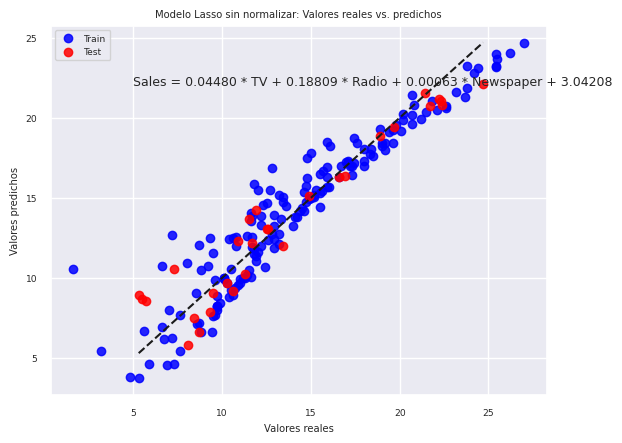

La ecuación para estimar las ventas con el modelo Lasso sin normalizar es: 

Sales = 0.04480 * TV + 0.18809 * Radio + 0.00063 * Newspaper + 3.04208

Modelo Lasso normalizado - R2: 0.9076838114445439, MAE: 1.3740706975903065, MSE: 2.9613556229573437


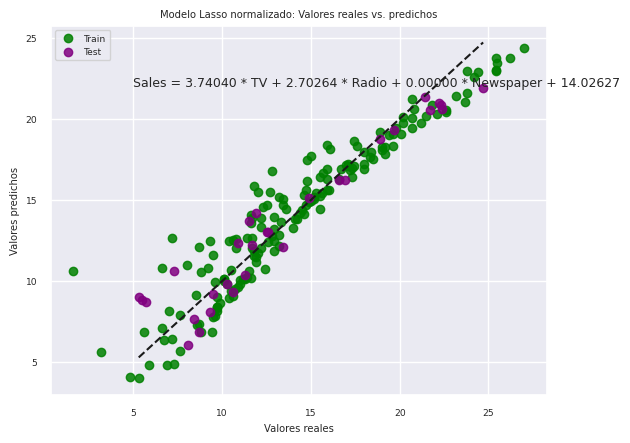


La ecuación para estimar las ventas con el modelo Lasso normalizado es: 

Sales = 3.74040 * TV + 2.70264 * Radio + 0.00000 * Newspaper + 14.02627


In [46]:
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# Mejor valor de alpha encontrado para el modelo sin normalizar
mejor_alpha = 0.1

# Entrenar un modelo Lasso con los datos sin normalizar
lasso_model = Lasso(alpha=mejor_alpha)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Calcular y mostrar las métricas de rendimiento
r2 = r2_score(y_test, lasso_predictions)
mae = mean_absolute_error(y_test, lasso_predictions)
mse = mean_squared_error(y_test, lasso_predictions)
print(f"Modelo Lasso sin normalizar - R2: {r2}, MAE: {mae}, MSE: {mse}")

# Crear una figura para el modelo sin normalizar
plt.figure(dpi=100)
plt.scatter(y_train, lasso_model.predict(X_train), c='blue', alpha=0.85, label='Train')
plt.scatter(y_test, lasso_predictions, c='red',alpha=0.85,label='Test')
plt.plot(xaxis, xaxis, 'k--')
plt.legend(loc='best')
plt.title("Modelo Lasso sin normalizar: Valores reales vs. predichos")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.text(5, 22, expression, fontsize=9)
plt.show()

# Formar la ecuación
Coef_Mod = lasso_model.coef_
expression = "Sales = "
for coef, column in zip(Coef_Mod, ['TV', 'Radio', 'Newspaper']):
    expression += f"{coef:.5f} * {column} + "
expression += f"{lasso_model.intercept_:.5f}"  # Añadir el término de intercepción
print("La ecuación para estimar las ventas con el modelo Lasso sin normalizar es: \n")
print(expression)

# Mejor valor de alpha encontrado para el modelo normalizado
mejor_alpha_normalizado = 0.1

# Entrenar un modelo Lasso con los datos normalizados
lasso_model_scaled = Lasso(alpha=mejor_alpha_normalizado)
lasso_model_scaled.fit(X_train_scaled, y_train)
lasso_predictions_scaled = lasso_model_scaled.predict(X_test_scaled)

# Calcular y mostrar las métricas de rendimiento
r2_scaled = r2_score(y_test, lasso_predictions_scaled)
mae_scaled = mean_absolute_error(y_test, lasso_predictions_scaled)
mse_scaled = mean_squared_error(y_test, lasso_predictions_scaled)
print(f"\nModelo Lasso normalizado - R2: {r2_scaled}, MAE: {mae_scaled}, MSE: {mse_scaled}")

# Crear una figura para el modelo normalizado
plt.figure(dpi=100)
plt.scatter(y_train, lasso_model_scaled.predict(X_train_scaled), c='green', alpha=0.85, label='Train')
plt.scatter(y_test, lasso_predictions_scaled, c='purple', alpha=0.85, label='Test')
plt.plot(xaxis, xaxis, 'k--')
plt.legend(loc='best')
plt.title("Modelo Lasso normalizado: Valores reales vs. predichos")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.text(5, 22, expression_scaled, fontsize=9)
plt.show()

# Formar la ecuación
Coef_Mod_scaled = lasso_model_scaled.coef_
expression_scaled = "Sales = "
for coef, column in zip(Coef_Mod_scaled, ['TV', 'Radio', 'Newspaper']):
    expression_scaled += f"{coef:.5f} * {column} + "
expression_scaled += f"{lasso_model_scaled.intercept_:.5f}"  # Añadir el término de intercepción
print("\nLa ecuación para estimar las ventas con el modelo Lasso normalizado es: \n")
print(expression_scaled)
